# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
selected_columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
                    'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
full_df = merged_df[selected_columns]
full_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = full_df.loc[full_df.duplicated,'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_df[full_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_df["Mouse ID"].nunique
total_mice_clean()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume').to_frame().join(
                    clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median Tumor Volume')).join(
                    clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Variance')).join(
                    clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Standard Deviation')).join(
                    clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('SEM'))

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})
summary_stats_agg

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


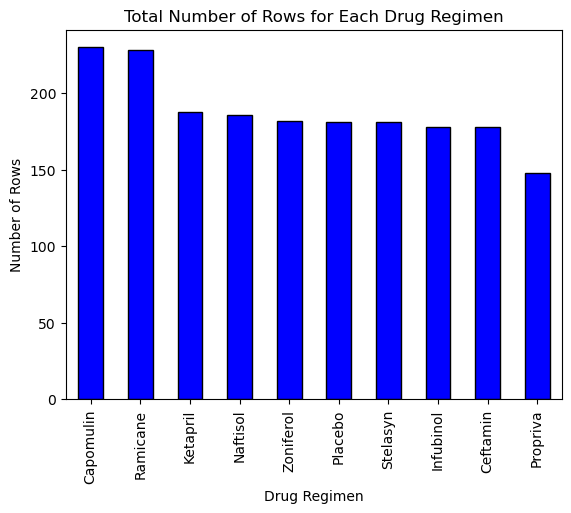

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()

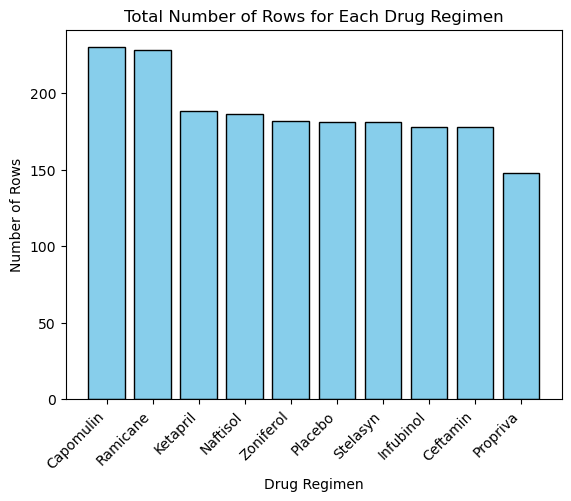

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue', edgecolor='black')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.xticks(rotation=45, ha='right')

plt.show()

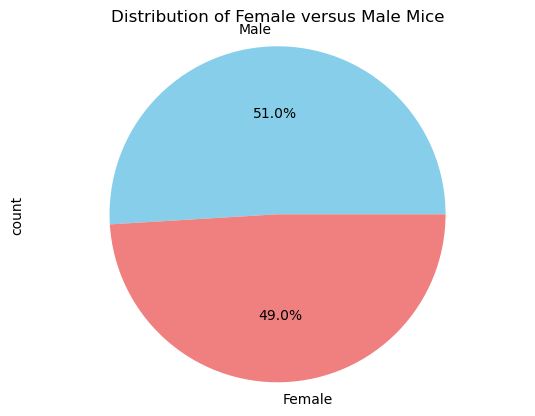

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')

plt.show()

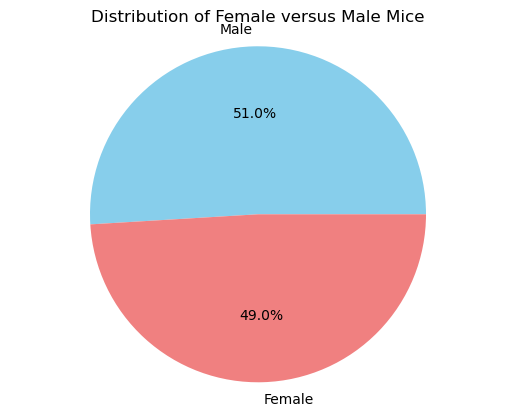

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_df['Sex'].value_counts()

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimes = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse
treatment_regimes = treatment_regimes.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = treatment_regimes.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = 'left')
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
mt_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_Volume = merge_df.loc[merge_df["Drug Regimen"] ==drug, "Tumor Volume (mm3)"]
        
    # add subset 
    mt_list.append(Tumor_Volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = Tumor_Volume.quantile([0.25, 0.5, 0.75])
    high_quartile = quartiles[0.75]
    lower_quartile = quartiles[0.25]
    iqr = high_quartile - lower_quartile
    lower_boundary = lower_quartile - (iqr * 1.5)
    upper_boundary = high_quartile + (iqr * 1.5)
    
    outliers = Tumor_Volume.loc[(Tumor_Volume < lower_boundary) |  (Tumor_Volume > upper_boundary)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


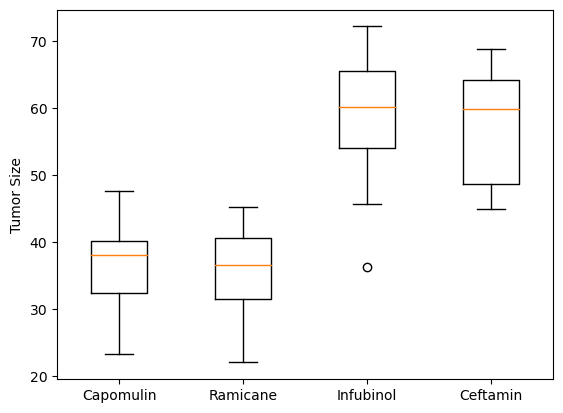

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(mt_list,labels = treatment_list)
plt.ylabel("Tumor Size")
plt.show()

## Line and Scatter Plots

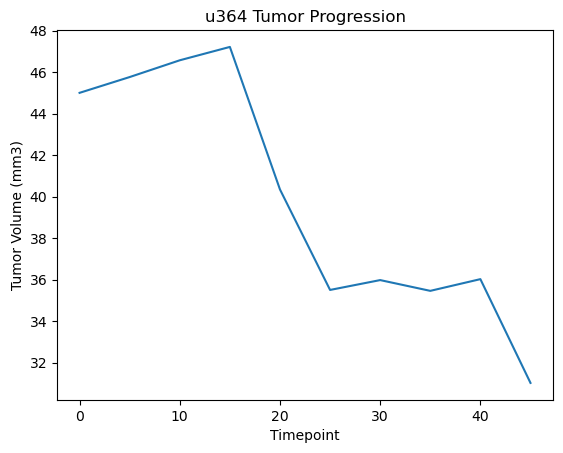

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_df.loc[clean_df["Drug Regimen"] =="Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == "u364"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("u364 Tumor Progression")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

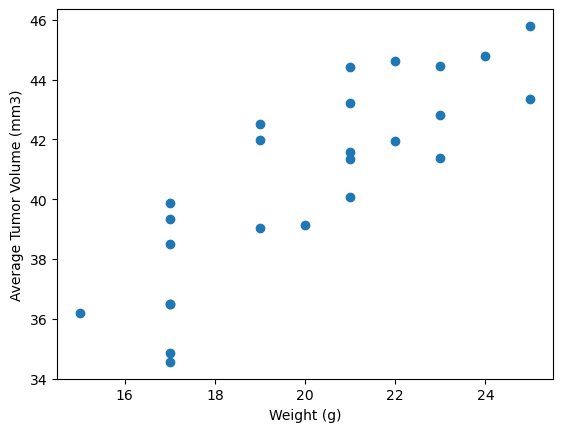

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_cap = capomulin_table["Tumor Volume (mm3)"].mean()
mouse_weight_avg = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(mouse_weight_avg['Weight (g)'], mouse_weight_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_table = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
# capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
# plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
